<a href="https://colab.research.google.com/github/gwangjinjeong/Pytorch/blob/master/basic/02_Dataset_Transform_Compose_02_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset & Transform & Compose - **Fashion_MNIST**

##0. Preparation

Connect the Google drive 

In [1]:
from google.colab import files
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at ./gdrive


In [2]:
cd /content/gdrive/My\ Drive/'Self Development'/Pytorch

/content/gdrive/My Drive/Self Development/Pytorch


Connect the kaggle API

In [0]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!pip install -q kaggle
!pip install -q kaggle-cli
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip 

Import libraries

In [3]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
from keras.utils import to_categorical

torch.manual_seed(0)

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

Using TensorFlow backend.


## 1. Auxiliary Functions

In [0]:
def show_data(data_sample, shape = (28, 28)):
    output_mapping = {
    0: "T-shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat", 
    5: "Sandal", 
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot"}
    plt.imshow(np.array(data_sample[0]).reshape(shape), cmap='gray')
    plt.title('y = ' + output_mapping[data_sample[1]])

In [0]:
directory="./"
csv_file ='fashion-mnist_train.csv'
csv_path=os.path.join(directory,csv_file)

In [6]:
data_name = pd.read_csv(csv_path)
data_name.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


First columns : label   
* 0: "T-shirt/Top"
* 1: "Trouser"
* 2: "Pullover"
* 3: "Dress"
* 4: "Coat" 
* 5: "Sandal"
* 6: "Shirt"
* 7: "Sneaker"
* 8: "Bag"
* 9: "Ankle Boot"

The others : pixel   
이 이미지는 28x28로 이루어져있다.

## 2. Load Image

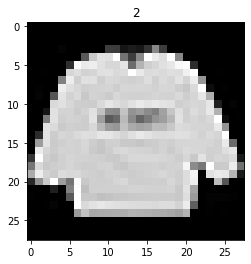

In [8]:
img_rows, img_cols = 28, 28
X = np.array(data_name.iloc[:, 1:])
X = X.reshape(X.shape[0], img_rows, img_cols)
y = np.array(data_name['label'])
plt.imshow(X[0], cmap='gray')
plt.title(y[0])
plt.show()

## 3. Create a Dataset Class

In this section, we will use the components in the last section to build a dataset class and then create an object.

In [0]:
class Dataset(Dataset):

    def __init__(self, csv_file, data_dir, transform=None):


        self.data_dir=data_dir
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        image = np.array(self.data_name.iloc[:, 1:])
        self.y_name = self.data_name.iloc[:, 0].replace(output_mapping)
        self.y = np.array(self.data_name.iloc[:, 0])
        self.y_name = np.array(self.y_name)
        self.images = np.asarray(image).reshape(-1, 28, 28).astype('float32')

        # Number of images in dataset
        self.len=self.data_name.shape[0] 

    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # The Pixel columns to numpy
        y = self.y[idx]
        image = Image.fromarray(self.images[idx].astype('uint8'))
        
        if self.transform is not None:
            image = self.transform(image)

        return image, y


In [0]:
# Create the dataset objects
dataset = Dataset(csv_file=csv_file, data_dir=directory)

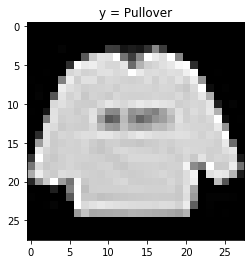

In [30]:
show_data(dataset[0])

Similarly, you can plot the second image: 

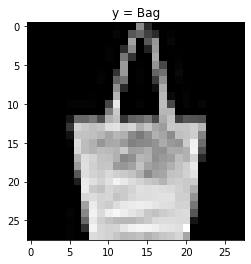

In [31]:
show_data(dataset[9])

## 4. Torchvision Transforms

In [0]:
import torchvision.transforms as transforms

In [0]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,
                  transform=croptensor_data_transform)

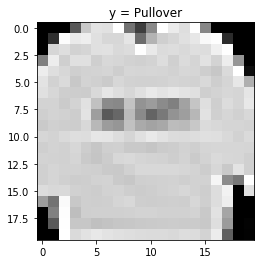

In [34]:
show_data(dataset[0],shape=(20,20))

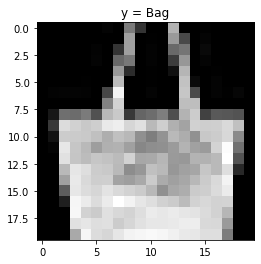

In [35]:
show_data(dataset[9],shape=(20,20))

In [0]:
# Construct the compose. Apply it on MNIST dataset. Plot the image out.

fliptensor_data_transform = transforms.Compose([transforms.RandomVerticalFlip(p=1),transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file , data_dir=directory,transform=fliptensor_data_transform )

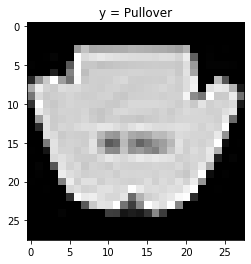

In [39]:
show_data(dataset[0])

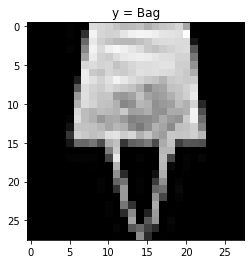

In [38]:
show_data(dataset[9])